In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [43]:
data= pd.read_csv('Social_Network_Ads.csv')

In [44]:
real_x= data.iloc[:,[2,3]].values
real_y= data.iloc[:,4].values

In [45]:
train_x ,test_x , train_y , test_y= train_test_split(real_x,real_y,test_size=0.25,random_state=0)

In [54]:
 #feature scaling
s_c= StandardScaler()
train_x= s_c.fit_transform(train_x)
test_x= s_c.fit_transform(test_x)

In [55]:
#building classifier
classifier_rfc= RandomForestClassifier(n_estimators=10, criterion='entropy' ,random_state=0)
classifier_rfc.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [56]:
y_pred= classifier_rfc.predict(test_x)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [57]:
test_y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [58]:
c_m= confusion_matrix(test_y,y_pred)
c_m

array([[63,  5],
       [ 5, 27]], dtype=int64)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


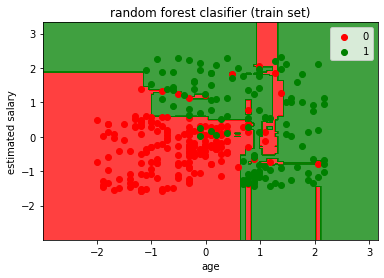

In [59]:
from matplotlib.colors import ListedColormap
x_set , y_set = train_x , train_y
x1 , x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1, stop=x_set[:,0].max() + 1 , step=0.01), 
                      np.arange(start=x_set[:,0].min()-1, stop=x_set[:,1].max() + 1 , step=0.01))

plt.contourf(x1,x2,classifier_rfc.predict(np.array([x1.ravel(), x2.ravel()  ]).T).reshape(x1.shape), 
             alpha=0.75, cmap=ListedColormap(('red','green')))

plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(), x2.max())
for i,j in enumerate(np.unique(y_set)) :
    plt.scatter(x_set[y_set == j,0], x_set[y_set==j,1],
                c=ListedColormap(('red','green'))(i), label=j)
plt.title('random forest clasifier (train set)')
plt.xlabel('age')
plt.ylabel('estimated salary')
plt.legend()
plt.show() 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


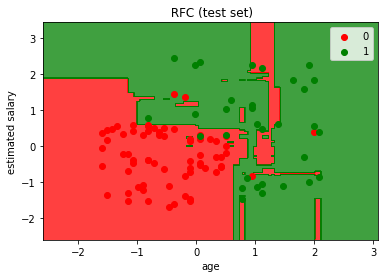

In [60]:
 from matplotlib.colors import ListedColormap
x_set , y_set = test_x , test_y
x1 , x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1, stop=x_set[:,0].max() + 1 , step=0.01), 
                      np.arange(start=x_set[:,0].min()-1, stop=x_set[:,1].max() + 1 , step=0.01))

plt.contourf(x1,x2,classifier_rfc.predict(np.array([x1.ravel(), x2.ravel()  ]).T).reshape(x1.shape), 
             alpha=0.75, cmap=ListedColormap(('red','green')))

plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(), x2.max())
for i,j in enumerate(np.unique(y_set)) :
    plt.scatter(x_set[y_set == j,0], x_set[y_set==j,1],
                c=ListedColormap(('red','green'))(i), label=j)
plt.title(' RFC (test set)')
plt.xlabel('age')
plt.ylabel('estimated salary')
plt.legend()
plt.show()  